In [21]:
# All tickets in the roadmap for August for the anti censroship team roadmap
# Query https://trac.torproject.org/projects/tor/query?status=accepted&status=assigned&status=closed&status=merge_ready&status=needs_information&status=needs_review&status=needs_revision&status=new&status=reopened&keywords=~anti-censorship-roadmap-july&col=id&col=summary&col=keywords&col=status&col=owner&col=type&col=priority&col=milestone&col=component&col=severity&col=resolution&col=actualpoints&col=points&col=reviewer&col=sponsor&order=priority

csv_path='/Users/gaba/Code/torproject/trac/datasets/AntiCensorshipTeam-Roadmap-August-2019.csv'

import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

csv_file = pd.read_csv(csv_path)
open_tickets = csv_file.query('Status!="closed"')
closed_tickets = csv_file.query('Status=="closed"')


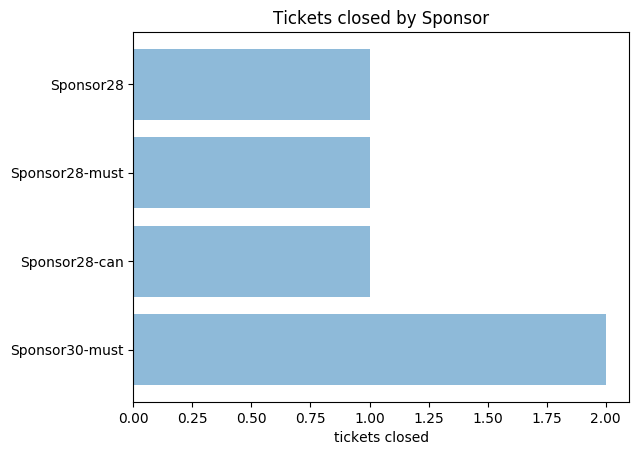

In [22]:
# which sponsors got ticket closed
closed_tickets_by_sponsor = csv_file.query('Status=="closed"')['Sponsor'].value_counts()

objects = tuple(closed_tickets_by_sponsor.keys())
y_pos = np.arange(len(objects))
performance = list(closed_tickets_by_sponsor)

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('tickets closed')
plt.title('Tickets closed by Sponsor')

plt.show()

In [25]:
# who closed tickets
closed_tickets['Owner'].value_counts()

phw        1
cohosh     1
arlolra    1
Name: Owner, dtype: int64

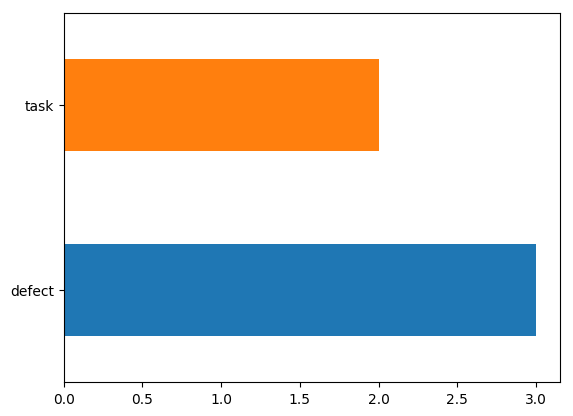

In [26]:
# What type of tickets we got
closed_tickets['Type'].value_counts().plot.barh()

In [27]:
# How many high and very high tickets
closed_tickets['Priority'].value_counts()

Medium       3
Very High    1
High         1
Name: Priority, dtype: int64

In [28]:
# How many 'big' tickets got resolved
closed_tickets['Points'].value_counts()

3.0    2
5.0    1
2.0    1
Name: Points, dtype: int64

In [29]:

# How tickets got resolved
closed_tickets['Resolution'].value_counts()

fixed        4
duplicate    1
Name: Resolution, dtype: int64

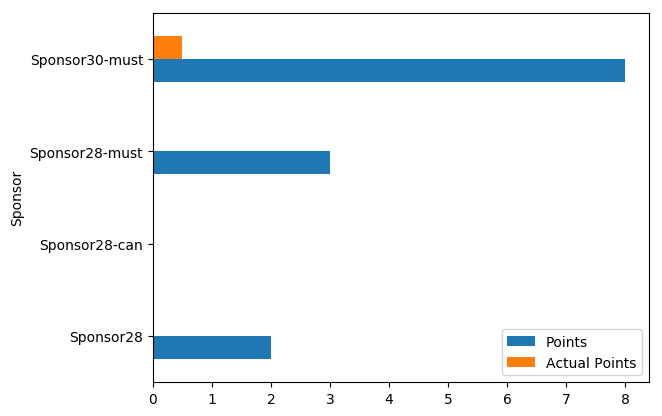

In [30]:
# How many days took to complete the ticket versus estimation
closed_tickets.filter(items=['Sponsor', 'Points', 'Actual Points']).groupby('Sponsor').sum().plot.barh()


In [31]:
# Velocity for the month of July

closed_tickets.filter(items=['Actual Points']).sum()

Actual Points    0.5
dtype: float64

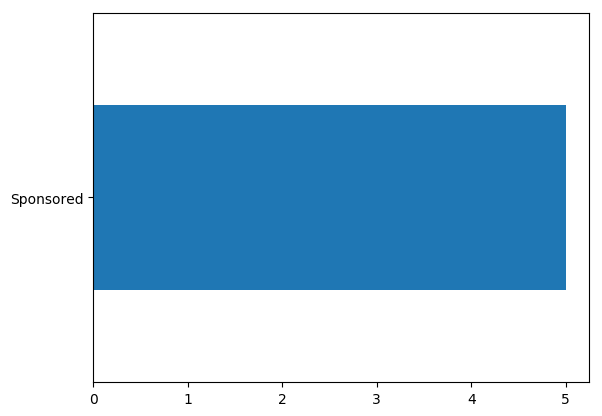

In [32]:
# How much work was not sponsored

sponsor_and_not = closed_tickets['Sponsor'].notnull().value_counts().rename(lambda x: 'Sponsored' if x else 'Not Sponsored')

sponsor_and_not.plot.barh()


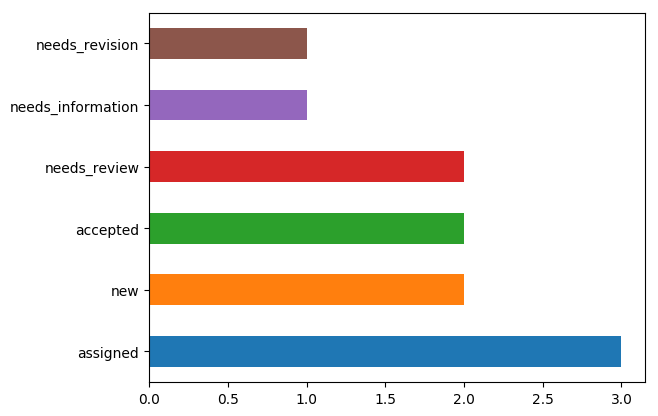

In [36]:
open_tickets['Status'].value_counts().plot.barh()

In [37]:
open_tickets

,id,Summary,Keywords,Status,Owner,Type,Priority,Milestone,Component,Severity,Resolution,Actual Points,Points,Reviewer,Sponsor
0,19001,Tor Browser with Snowflake,anti-censorship-roadmap-august,new,NaN,project,Very High,NaN,Circumvention/Snowflake,Critical,NaN,NaN,NaN,NaN,Sponsor28-must
3,25483,Windows reproducible build of snowflake,"TorBrowserTeam201805, anti-censorship-roadmap-...",needs_review,cohosh,project,High,NaN,Circumvention/Snowflake,Normal,NaN,NaN,NaN,NaN,Sponsor28-must
4,29285,Improve the PT spec and how PTs interface with...,anti-censorship-roadmap-august,assigned,phw,project,High,NaN,Circumvention/Pluggable transport,Normal,NaN,NaN,15.0,NaN,Sponsor28-must
5,30716,Improve the obfs4 obfuscation protocol,"sponsor28, anti-censorship-roadmap-august",assigned,phw,task,High,NaN,Circumvention/Obfs4,Normal,NaN,NaN,20.0,NaN,Sponsor28-must
8,28672,Android reproducible build of Snowflake,"tbb-mobile, tbb-rbm, GeorgKoppen201904, ex-spo...",needs_revision,NaN,project,Medium,NaN,Circumvention/Snowflake,Normal,NaN,NaN,NaN,NaN,Sponsor28-must
9,28942,Evaluate pion WebRTC,anti-censorship-roadmap-august,needs_review,cohosh,enhancement,Medium,NaN,Circumvention/Snowflake,Normal,NaN,NaN,5.0,NaN,Sponsor28-must
10,29205,Look into using Firefox for the WebRTC impleme...,anti-censorship-roadmap-august,new,NaN,task,Medium,NaN,Circumvention/Snowflake,Normal,NaN,NaN,NaN,NaN,Sponsor28-can
11,29258,What is the IPv6 story with Snowflake,anti-censorship-roadmap-august,needs_information,dcf,task,Medium,NaN,Circumvention/Snowflake,Normal,NaN,NaN,NaN,NaN,Sponsor28-must
13,30368,Run some tests to check reachability of snowfl...,anti-censorship-roadmap-august,accepted,cohosh,task,Medium,NaN,Circumvention/Snowflake,Normal,NaN,NaN,NaN,NaN,Sponsor28-can
14,30986,"Understand the ""long tail"" of unclassifiable n...",anti-censorship-roadmap-august,assigned,phw,project,Medium,NaN,Circumvention,Normal,NaN,NaN,5.0,NaN,Sponsor28-must
